In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.feature_selection import SequentialFeatureSelector as sfs
import seaborn as sns
# from fitter import Fitter
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

### Initial data cleaning
Rename, merge, and drop columns\
There are several columns that exist only in 2022

In [229]:
df_2020 = pd.read_excel('Fund_Shares_2020_10_18.xlsx',sheet_name = 'Shareclasses')
df_2021 = pd.read_excel('Fund_Shares_2021_11_13.xlsx',sheet_name = 'Shareclasses')
df_2022 = pd.read_excel('Fund_Shares_2022_12_16.xlsx',sheet_name = 'Shareclasses')

In [230]:
df_2020

Fund profile: Shareclass name Fund profile: Ticker  \
0              1290 SmartBeta Equity A                TNBAX   
1              1290 SmartBeta Equity I                TNBIX   
2              1290 SmartBeta Equity R                TNBRX   
3              1290 SmartBeta Equity T                TNBCX   
4                       13D Activist A                DDDAX   
...                                ...                  ...   
9224         Xtrackers S&P 500 ESG ETF                 SNPE   
9225   Zevenbergen Genea Institutional                ZVGIX   
9226        Zevenbergen Genea Investor                ZVGNX   
9227  Zevenbergen Growth Institutional                ZVNIX   
9228       Zevenbergen Growth Investor                ZVNBX   

         Fund profile: Fund name      Fund profile: Asset manager  \
0     1290 SmartBeta Equity Fund                       1290 Funds   
1     1290 SmartBeta Equity Fund                       1290 Funds   
2     1290 SmartBeta Equity Fund                       1290 Funds   
3     1290 SmartBeta Equity Fund                       1290 Funds   
4              13D Activist Fund                13D Activist Fund   
...                          ...                              ...   
9224   Xtrackers S&P 500 ESG ETF                        Xtrackers   
9225      Zevenbergen Genea Fund  Zevenbergen Capital Investments   
9226      Zevenbergen Genea Fund  Zevenbergen Capital Investments   
9227     Zevenbergen Growth Fund  Zevenbergen Capital Investments   
9228     Zevenbergen Growth Fund  Zevenbergen Capital Investments   

     Fund profile: Shareclass type Fund profile: Shareclass inception date  \
0             Open-end mutual fund                              2014-11-12   
1             Open-end mutual fund                              2014-11-12   
2             Open-end mutual fund                              2014-11-12   
3             Open-end mutual fund                              2014-11-12   
4             Open-end mutual fund                              2011-12-28   
...                            ...                                     ...   
9224                           ETF                              2019-06-25   
9225          Open-end mutual fund                              2015-08-31   
9226          Open-end mutual fund                              2015-08-31   
9227          Open-end mutual fund                              2015-08-31   
9228          Open-end mutual fund                              2015-08-31   

     Fund profile: Category group Fund profile: Sustainability mandate  \
0      International Equity Funds                                    Y   
1      International Equity Funds                                    Y   
2      International Equity Funds                                    Y   
3      International Equity Funds                                    Y   
4                U.S. Equity Fund                                    Y   
...                           ...                                  ...   
9224             U.S. Equity Fund                                    Y   
9225             U.S. Equity Fund                                    Y   
9226             U.S. Equity Fund                                    Y   
9227             U.S. Equity Fund                                    Y   
9228             U.S. Equity Fund                                    Y   

     Fund profile: US-SIF member  \
0                            NaN   
1                            NaN   
2                            NaN   
3                            NaN   
4                            NaN   
...                          ...   
9224                         NaN   
9225                         NaN   
9226                         NaN   
9227                         NaN   
9228                         NaN   

     Fund profile: Oldest shareclass inception date  ...  \
0                                        2014-11-12  ...   
1                                        201

In [175]:
def initial_clean(df):
  df = df.rename(columns={'Returns and fees: Month end trailing returns, 3 year':'return_3_year'})
  df = df.drop(columns=['Returns and fees: Month end trailing returns, 3 month',
                        'Returns and fees: Month end trailing returns, 6 month',
                        'Returns and fees: Month end trailing returns, 1 year',
                        'Returns and fees: Month end trailing returns, 1 month',
                        'Returns and fees: Month end trailing returns, 5 year',
                        'Returns and fees: Month end trailing returns, 10 year',
                        'Returns and fees: Month end trailing returns, 15 year',
                        'Returns and fees: Month end trailing returns, 20 year',
                        'Returns and fees: Prospectus net expense ratio',
                        'Returns and fees: Month end trailing returns, year-to-date',
                        'Returns and fees: Month end trailing returns, since inception',
                        'Fund profile: Ticker',
                        'Fund profile: Fund name',
                        'Fund profile: Asset manager',
                        'Fund profile: Target date',
                        'Fund profile: Portfolio holdings as-of date',
                        'Returns and fees: Financial performance as-of date',
                        'Fund profile: Target date',
                        'Fund profile: Shareclass tickers'])
  return df

In [195]:
df_2020_1 = df_2020.rename(columns={'Financial performance: Month end trailing returns, year 3':'return_3_year'})
df_2020_1 = df_2020_1.drop(columns=['Financial performance: Financial performance as-of date',
                                    'Financial performance: Month end trailing returns, year 1',
                                    'Financial performance: Month end trailing returns, year 5',
                                    'Financial performance: Month end trailing returns, year 10',
                                    'Fund profile: Ticker',
                                    'Fund profile: Fund name',
                                    'Fund profile: Shareclass tickers',
                                    'Fund profile: Asset manager',
                                    'Fund profile: Portfolio holdings as-of date'])

In [196]:
df_2021_1 = initial_clean(df_2021)
df_2022_1 = initial_clean(df_2022)

In [197]:
df_2022_1 = df_2022_1.drop(columns=['Fossil Free Funds: Fossil fuel finance grade'
                                  , 'Fossil Free Funds: Fossil fuel finance fund score'
                                  , 'Fossil Free Funds: Fossil fuel finance holdings, count'
                                  , 'Fossil Free Funds: Fossil fuel finance holdings, weight'
                                  , 'Fossil Free Funds: Fossil fuel finance holdings, asset'
                                  , 'Fossil Free Funds: Fossil fuel insurance grade'
                                  , 'Fossil Free Funds: Fossil fuel insurance fund score'
                                  , 'Fossil Free Funds: Fossil fuel insurance holdings, count'
                                  , 'Fossil Free Funds: Fossil fuel insurance holdings, weight'
                                  , 'Fossil Free Funds: Fossil fuel insurance holdings, asset'])

In [198]:
df_2020_1['year'] = '2020-10-18'
df_2021_1['year'] = '2021-11-13'
df_2022_1['year'] = '2022-12-16'

In [199]:
frames = [df_2020_1, df_2021_1, df_2022_1]
data = pd.concat(frames)

In [200]:
data = data.dropna(subset=['return_3_year'])

In [182]:
data.head()

Fund profile: Shareclass name Fund profile: Shareclass type  \
0       1290 SmartBeta Equity A          Open-end mutual fund   
1       1290 SmartBeta Equity I          Open-end mutual fund   
2       1290 SmartBeta Equity R          Open-end mutual fund   
3       1290 SmartBeta Equity T          Open-end mutual fund   
4                13D Activist A          Open-end mutual fund   

  Fund profile: Shareclass inception date Fund profile: Category group  \
0                              2014-11-12   International Equity Funds   
1                              2014-11-12   International Equity Funds   
2                              2014-11-12   International Equity Funds   
3                              2014-11-12   International Equity Funds   
4                              2011-12-28             U.S. Equity Fund   

  Fund profile: Sustainability mandate Fund profile: US-SIF member  \
0                                    Y                         NaN   
1                                    Y                         NaN   
2                                    Y                         NaN   
3                                    Y                         NaN   
4                                    Y                         NaN   

  Fund profile: Oldest shareclass inception date  \
0                                     2014-11-12   
1                                     2014-11-12   
2                                     2014-11-12   
3                                     2014-11-12   
4                                     2011-12-28   

   Fund profile: Fund net assets  Fund profile: Percent rated  \
0                       46040734                     0.980870   
1                       46040734                     0.980870   
2                       46040734                     0.980870   
3                       46040734                     0.980870   
4                      190563078                     0.952021   

  Fossil Free Funds: Fossil fuel grade  ...  \
0                                    C  ...   
1                                    C  ...   
2                                    C  ...   
3                                    C  ...   
4                                    C  ...   

   Weapon Free Funds: Cluster munitions / landmines, asset  \
0                                                  0         
1                                                  0         
2                                                  0         
3                                                  0         
4                                                  0         

   Tobacco Free Funds: Tobacco grade  \
0                                  B   
1                                  B   
2                                  B   
3                                  B   
4                                  A   

   Tobacco Free Funds: Tobacco producer, count  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   Tobacco Free Funds: Tobacco producer, weight  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   Tobacco Free Funds: Tobacco producer, asset  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   Tobacco Free Funds: Tobacco-promoting entertainment company, count  \
0                                                  2                    
1                                                  2                    
2               

### Target variable distribution

Text(0, 0.5, 'No. of fund')

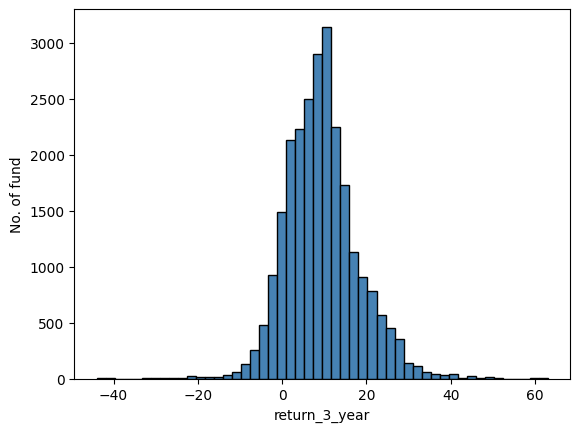

In [ ]:
plt.hist(data['return_3_year'], color='steelblue', edgecolor='black', bins=50)
plt.xlabel('return_3_year')
plt.ylabel('No. of fund')

2024-02-09 16:41:45.444 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED _fit distribution (taking more than 30 seconds)
2024-02-09 16:41:45.712 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted anglit distribution with error=0.018415)
2024-02-09 16:41:46.202 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted arcsine distribution with error=0.034555)
2024-02-09 16:41:46.294 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted alpha distribution with error=0.00093)
2024-02-09 16:41:46.735 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted argus distribution with error=0.022944)
2024-02-09 16:41:47.714 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted beta distribution with error=0.001029)
2024-02-09 16:41:48.041 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted bradford distribution with error=0.026701)
2024-02-09 16:41:48.197 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fi

sumsquare_error          aic          bic  kl_div  ks_statistic  \
burr12               0.000448  1616.197959  1648.716625     inf      0.014516   
genlogistic          0.000469  1560.851923  1585.240923     inf      0.017205   
norminvgauss         0.000471  1491.111897  1523.630563     inf      0.015218   
johnsonsu            0.000471  1467.312981  1499.831647     inf      0.015766   
fisk                 0.000475  1542.124468  1566.513467     inf      0.016357   

                 ks_pvalue  
burr12        5.091482e-05  
genlogistic   7.053973e-07  
norminvgauss  1.787281e-05  
johnsonsu     7.628630e-06  
fisk          2.941913e-06

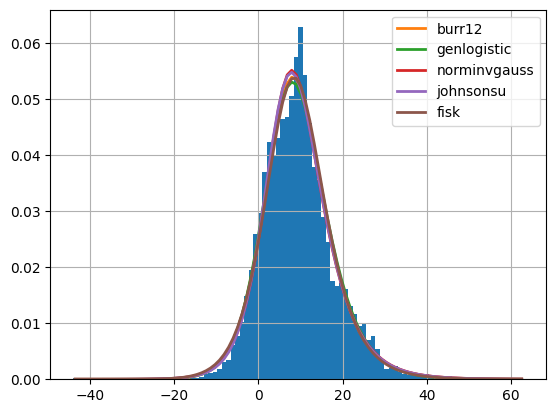

In [ ]:
f = Fitter(data['return_3_year'])
f.fit()
f.summary()

### Feature engineering

In [201]:
for col in ['Fund profile: Sustainability mandate', 'Fund profile: US-SIF member']:
  data[col] = data[col].fillna(0)
  data.loc[data[col]=='Y', col] = 1

In [202]:
data['Fund profile: Shareclass inception date'] = pd.to_datetime(data['Fund profile: Shareclass inception date'])
data['Fund profile: Oldest shareclass inception date'] = pd.to_datetime(data['Fund profile: Oldest shareclass inception date'])

In [203]:
data['inception_date_cnt'] = (pd.to_datetime(data.year) - data['Fund profile: Shareclass inception date']).dt.days
data['oldest_inception_date_cnt'] = (pd.to_datetime(data.year) - data['Fund profile: Oldest shareclass inception date']).dt.days

data = data.drop(columns=['Fund profile: Shareclass inception date',
                                      'Fund profile: Oldest shareclass inception date'])

In [204]:
data = pd.get_dummies(data, prefix=['share_type'], columns=['Fund profile: Shareclass type'], drop_first=1)
data = pd.get_dummies(data, prefix=['cat_group'], columns=['Fund profile: Category group'], drop_first=1)

In [205]:
for col in data.columns:
    if col.count('grade') > 0:
        data[col + '_CDF'] = 0
        data.loc[data[col].isin(['C', 'D', 'F']), col + '_CDF'] = 1
        data = data.drop(columns=[col])

In [206]:
data = data.drop(columns=['year'])

### Initil feature selection
Eleiminate columns with similar correlation

There are NA value in gender equality scores

In [207]:
data = data.drop(columns=['Fund profile: Shareclass name',
                          'Gender Equality Funds: Gender equality group ranking',
                          'Gender Equality Funds: Gender equality score - Overall score (out of 100 points)',
                          'Gender Equality Funds: Gender equality score - Gender balance in leadership and workforce (out of 40 points)',
                          'Gender Equality Funds: Gender equality score - Equal compensation and work life balance (out of 30 points)',
                          'Gender Equality Funds: Gender equality score - Policies promoting gender equality (out of 20 points)',
                          'Gender Equality Funds: Gender equality score - Commitment, transparency, and accountability (out of 10 points)'])

Using VIF

In [224]:
data['Fund profile: Sustainability mandate'] = data['Fund profile: Sustainability mandate'].astype(int)
data['Fund profile: US-SIF member'] = data['Fund profile: US-SIF member'].astype(int)

In [226]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif_data = pd.DataFrame() 
vif_data["feature"] = data.columns 
vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))] 
  
print(vif_data)

                                               feature          VIF
0                 Fund profile: Sustainability mandate     1.339875
1                          Fund profile: US-SIF member     1.207121
2                        Fund profile: Fund net assets   112.196611
3                          Fund profile: Percent rated     1.724922
4       Fossil Free Funds: Fossil fuel holdings, count  1599.369869
..                                                 ...          ...
99    Gender Equality Funds: Gender equality grade_CDF     1.936548
100         Gun Free Funds: Civilian firearm grade_CDF     4.204719
101  Prison Free Funds: Prison industrial complex g...     2.763658
102       Weapon Free Funds: Military weapon grade_CDF     2.427950
103              Tobacco Free Funds: Tobacco grade_CDF     3.528360

[104 rows x 2 columns]


In [227]:
vif_data[vif_data['VIF']>10]

feature          VIF
2                       Fund profile: Fund net assets   112.196611
4      Fossil Free Funds: Fossil fuel holdings, count  1599.369869
5     Fossil Free Funds: Fossil fuel holdings, weight   123.826857
6      Fossil Free Funds: Fossil fuel holdings, asset  1138.680267
7    Fossil Free Funds: Carbon Underground 200, count    61.053062
..                                                ...          ...
84        Tobacco Free Funds: Tobacco producer, count    17.251080
87  Tobacco Free Funds: Tobacco-promoting entertai...    10.444435
89  Tobacco Free Funds: Tobacco-promoting entertai...    18.295667
94               cat_group_International Equity Funds    12.491882
96                         cat_group_U.S. Equity Fund    14.614780

[66 rows x 2 columns]

Drop columns that's highly correlated with other columns

In [190]:
corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

In [193]:
upper

Fund profile: Fund net assets  \
Fund profile: Fund net assets                                                 NaN   
Fund profile: Percent rated                                                   NaN   
Fossil Free Funds: Fossil fuel holdings, count                                NaN   
Fossil Free Funds: Fossil fuel holdings, weight                               NaN   
Fossil Free Funds: Fossil fuel holdings, asset                                NaN   
...                                                                           ...   
Gender Equality Funds: Gender equality grade_CDF                              NaN   
Gun Free Funds: Civilian firearm grade_CDF                                    NaN   
Prison Free Funds: Prison industrial complex gr...                            NaN   
Weapon Free Funds: Military weapon grade_CDF                                  NaN   
Tobacco Free Funds: Tobacco grade_CDF                                         NaN   

                                                    Fund profile: Percent rated  \
Fund profile: Fund net assets                                          0.060144   
Fund profile: Percent rated                                                 NaN   
Fossil Free Funds: Fossil fuel holdings, count                              NaN   
Fossil Free Funds: Fossil fuel holdings, weight                             NaN   
Fossil Free Funds: Fossil fuel holdings, asset                              NaN   
...                                                                         ...   
Gender Equality Funds: Gender equality grade_CDF                            NaN   
Gun Free Funds: Civilian firearm grade_CDF                                  NaN   
Prison Free Funds: Prison industrial complex gr...                          NaN   
Weapon Free Funds: Military weapon grade_CDF                                NaN   
Tobacco Free Funds: Tobacco grade_CDF                                       NaN   

                                                    Fossil Free Funds: Fossil fuel holdings, count  \
Fund profile: Fund net assets                                                             0.139036   
Fund profile: Percent rated                                                               0.272250   
Fossil Free Funds: Fossil fuel holdings, count                                                 NaN   
Fossil Free Funds: Fossil fuel holdings, weight                                                NaN   
Fossil Free Funds: Fossil fuel holdings, asset                                                 NaN   
...                                                                                            ...   
Gender Equality Funds: Gender equality grade_CDF                                               NaN   
Gun Free Funds: Civilian firearm grade_CDF                                                     NaN   
Prison Free Funds: Prison industrial complex gr...                                             NaN   
Weapon Free Funds: Military weapon grade_CDF                                                   NaN   
Tobacco Free Funds: Tobacco grade_CDF                                                          NaN   

                                                    Fossil Free Funds: Fossil fuel holdings, weight  \
Fund profile: Fund net assets                                                              0.009629   
Fund profile: Percent rated                                                                0.026237   
Fossil Free Funds: Fossil fuel holdings, count                                             0.076658   
Fossil Free Funds: Fossil fuel holdings, weight                                                 NaN   
Fossil Free Funds: Fossil fuel holdings, asset                                                  NaN   
...                                                                                             ...   
Gender Equality Funds: Gender equality grade_CDF                                        

In [ ]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
if 'return_3_year' in to_drop:
  to_drop.remove('return_3_year')
data = data.drop(columns=to_drop)

try: correlation a to b v.s. b to a

In [119]:
data.head()

Fund profile: Sustainability mandate Fund profile: US-SIF member  \
0                                    1                           0   
1                                    1                           0   
2                                    1                           0   
3                                    1                           0   
4                                    1                           0   

   Fund profile: Fund net assets  Fund profile: Percent rated  \
0                       46040734                     0.980870   
1                       46040734                     0.980870   
2                       46040734                     0.980870   
3                       46040734                     0.980870   
4                      190563078                     0.952021   

   Fossil Free Funds: Fossil fuel holdings, count  \
0                                              33   
1                                              33   
2                                              33   
3                                              33   
4                                               1   

   Fossil Free Funds: Fossil fuel holdings, weight  \
0                                         0.055182   
1                                         0.055182   
2                                         0.055182   
3                                         0.055182   
4                                         0.049526   

   Fossil Free Funds: Carbon Underground 200, weight  \
0                                           0.006902   
1                                           0.006902   
2                                           0.006902   
3                                           0.006902   
4                                           0.000000   

   Fossil Free Funds: Coal industry, weight  \
0                                  0.005241   
1                                  0.005241   
2                                  0.005241   
3                                  0.005241   
4                                  0.000000   

   Fossil Free Funds: Macroclimate 30 coal-fired utilities, weight  \
0                                           0.006715                 
1                                           0.006715                 
2                                           0.006715                 
3                                           0.006715                 
4                                           0.000000                 

   Fossil Free Funds: Relative carbon footprint (tonnes CO2 / $1M USD invested)  \
0                                              55.72                              
1                                              55.72                              
2                                              55.72                              
3                                              55.72                              
4                                              97.56                              

   ...  cat_group_International Equity Funds  cat_group_Sector Equity Funds  \
0  ...                                     1                              0   
1  ...                                     1                              0   
2  ...                                     1                              0   
3  ...                                     1                              0   
4  ...                                     0                              0   

   cat_group_U.S. Equity Fund  Fossil Free Funds: Fossil fuel grade_CDF  \
0                           0                                         1   
1                           0                                         1   
2                           0                                         1   
3                           0                                         1   
4                           1                                         1   

   Deforestation Free Funds: Deforestation grade_CDF  \
0                       

49 columns left

In [120]:
X = data.drop(columns=['return_3_year'])
y = data['return_3_year']

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Forwawrd feature selection

In [122]:
reg = LinearRegression()
sfs1 = sfs(reg, n_features_to_select=20)
sfs1.fit(X_train, y_train)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=20)

In [123]:
X_sfs = sfs1.transform(np.array(X))
X_sfs = pd.DataFrame(X_sfs, columns=X.columns[sfs1.get_support()])

### RFE

In [124]:
rfe = RFE(reg, n_features_to_select=20, step=1)
rfe = rfe.fit(X_train, y_train)

In [125]:
X_rfe = rfe.transform(np.array(X))
X_rfe = pd.DataFrame(X_rfe, columns=X.columns[rfe.get_support()])

### Gradient Boosting Machines

In [126]:
from interpret import set_visualize_provider
from interpret.provider import InlineProvider
from interpret import show
from interpret.glassbox import ExplainableBoostingRegressor
set_visualize_provider(InlineProvider())

In [127]:
X_train_sfs, X_test_sfs, y_train_sfs, y_test_sfs = train_test_split(X_sfs, y, test_size=0.33, random_state=42)
X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(X_rfe, y, test_size=0.33, random_state=42)

#### sfs result

In [128]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train_sfs, y_train_sfs)

GradientBoostingRegressor(random_state=0)

In [129]:
rmse = mean_squared_error(y_test_sfs, reg.predict(X_test_sfs), squared=False)
print("RMSE: {:.3f}".format(rmse))

RMSE: 5.877


#### rfe result

In [130]:
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train_rfe, y_train_rfe)
rmse = mean_squared_error(y_test_rfe, reg.predict(X_test_rfe), squared=False)
print("RMSE: {:.3f}".format(rmse))

RMSE: 6.059


### Explainable AI

In [131]:
ebm = ExplainableBoostingRegressor()
ebm.fit(X_train_sfs, y_train_sfs)

ExplainableBoostingRegressor()

In [132]:
rmse = mean_squared_error(y_test_sfs, ebm.predict(X_test_sfs), squared=False)
print("RMSE: {:.3f}".format(rmse))

RMSE: 4.797


In [133]:
show(ebm.explain_global())

In [134]:
ebm = ExplainableBoostingRegressor()
ebm.fit(X_train_rfe, y_train_rfe)
rmse = mean_squared_error(y_test_rfe, ebm.predict(X_test_rfe), squared=False)
print("RMSE: {:.3f}".format(rmse))

RMSE: 4.741


In [135]:
show(ebm.explain_global())

### DID data prep & function
based on Forward feature selection

In [136]:
def initial_clean_did(df):
  df = df.rename(columns={'Returns and fees: Month end trailing returns, 3 year':'return_3_year',
                         'Fund profile: Shareclass name':'shareclass_name'})
  df = df.drop(columns=['Returns and fees: Month end trailing returns, 3 month',
                        'Returns and fees: Month end trailing returns, 6 month',
                        'Returns and fees: Month end trailing returns, 1 year',
                        'Returns and fees: Month end trailing returns, 1 month',
                        'Returns and fees: Month end trailing returns, 5 year',
                        'Returns and fees: Month end trailing returns, 10 year',
                        'Returns and fees: Month end trailing returns, 15 year',
                        'Returns and fees: Month end trailing returns, 20 year',
                        'Returns and fees: Prospectus net expense ratio',
                        'Returns and fees: Month end trailing returns, year-to-date',
                        'Returns and fees: Month end trailing returns, since inception',
                        'Fund profile: Ticker',
                        'Fund profile: Fund name',
                        'Fund profile: Asset manager',
                        'Fund profile: Target date',
                        'Fund profile: Portfolio holdings as-of date',
                        'Returns and fees: Financial performance as-of date',
                        'Fund profile: Target date',
                        'Fund profile: Shareclass tickers'])
  return df

In [137]:
df_2020 = pd.read_excel('Fund_Shares_2020_10_18.xlsx',sheet_name = 'Shareclasses')
df_2021 = pd.read_excel('Fund_Shares_2021_11_13.xlsx',sheet_name = 'Shareclasses')
df_2022 = pd.read_excel('Fund_Shares_2022_12_16.xlsx',sheet_name = 'Shareclasses')
df_2020_1 = df_2020.rename(columns={'Financial performance: Month end trailing returns, year 3':'return_3_year',
                                   'Fund profile: Shareclass name':'shareclass_name'})
df_2020_1 = df_2020_1.drop(columns=['Financial performance: Financial performance as-of date',
                                    'Financial performance: Month end trailing returns, year 1',
                                    'Financial performance: Month end trailing returns, year 5',
                                    'Financial performance: Month end trailing returns, year 10',
                                    'Fund profile: Ticker',
                                    'Fund profile: Fund name',
                                    'Fund profile: Shareclass tickers',
                                    'Fund profile: Asset manager',
                                    'Fund profile: Portfolio holdings as-of date'])

In [146]:
df_2021_1 = initial_clean_did(df_2021)
df_2022_1 = initial_clean_did(df_2022)

In [147]:
df_2022_1 = df_2022_1.drop(columns=['Fossil Free Funds: Fossil fuel finance grade'
                                  , 'Fossil Free Funds: Fossil fuel finance fund score'
                                  , 'Fossil Free Funds: Fossil fuel finance holdings, count'
                                  , 'Fossil Free Funds: Fossil fuel finance holdings, weight'
                                  , 'Fossil Free Funds: Fossil fuel finance holdings, asset'
                                  , 'Fossil Free Funds: Fossil fuel insurance grade'
                                  , 'Fossil Free Funds: Fossil fuel insurance fund score'
                                  , 'Fossil Free Funds: Fossil fuel insurance holdings, count'
                                  , 'Fossil Free Funds: Fossil fuel insurance holdings, weight'
                                  , 'Fossil Free Funds: Fossil fuel insurance holdings, asset'])

In [148]:
df_2020_1['year'] = '2020-10-18'
df_2021_1['year'] = '2021-11-13'
df_2022_1['year'] = '2022-12-16'

In [152]:
def did_feature_eng(df):
    for col in ['Fund profile: Sustainability mandate', 'Fund profile: US-SIF member']:
      df[col] = df[col].fillna(0)
      df.loc[df[col]=='Y', col] = 1
    df['Fund profile: Shareclass inception date'] = pd.to_datetime(df['Fund profile: Shareclass inception date'])
    df['Fund profile: Oldest shareclass inception date'] = pd.to_datetime(df['Fund profile: Oldest shareclass inception date'])
    df['inception_date_cnt'] = (pd.to_datetime(df.year) - df['Fund profile: Shareclass inception date']).dt.days
    df['oldest_inception_date_cnt'] = (pd.to_datetime(df.year) - df['Fund profile: Oldest shareclass inception date']).dt.days
    
    df = df.drop(columns=['Fund profile: Shareclass inception date',
                        'Fund profile: Oldest shareclass inception date'])
    df = pd.get_dummies(df, prefix=['share_type'], columns=['Fund profile: Shareclass type'], drop_first=1)
    df = pd.get_dummies(df, prefix=['cat_group'], columns=['Fund profile: Category group'], drop_first=1)

    for col in df.columns:
        if col.count('grade') > 0:
            df[col + '_CDF'] = 0
            df.loc[df[col].isin(['C', 'D', 'F']), col + '_CDF'] = 1
            df = df.drop(columns=[col])
        
    df = df.drop(columns=['year'])
    df = df.rename(columns={'Fund profile: Fund name':'fund_name'})

    df = df[['Fund profile: Sustainability mandate', 'Fund profile: Fund net assets',
       'Fund profile: Percent rated',
       'Fossil Free Funds: Fossil fuel holdings, weight',
       'Fossil Free Funds: Coal industry, weight',
       'Fossil Free Funds: Carbon footprint portfolio coverage by market value weight',
       'Fossil Free Funds: Clean200, weight',
       'Deforestation Free Funds: Deforestation-risk financier, weight',
       'Gender Equality Funds: Weight of holdings with Equileap gender equality scores',
       'Prison Free Funds: All flagged, weight',
       'Prison Free Funds: All flagged, higher risk, weight',
       'Prison Free Funds: Private prison operators, count',
       'Weapon Free Funds: Military weapon, weight',
       'Tobacco Free Funds: Tobacco producer, weight',
       'Tobacco Free Funds: Tobacco-promoting entertainment company, weight',
       'cat_group_Sector Equity Funds', 'cat_group_U.S. Equity Fund',
       'Fossil Free Funds: Fossil fuel grade_CDF',
       'Prison Free Funds: Prison industrial complex grade_CDF',
       'Weapon Free Funds: Military weapon grade_CDF'] + ['return_3_year', 'shareclass_name']]
    df = df.dropna(subset=['return_3_year'])
    return df

In [153]:
df_2020_2 = did_feature_eng(df_2020_1)
df_2021_2 = did_feature_eng(df_2021_1)
df_2022_2 = did_feature_eng(df_2022_1)

In [166]:
def did_estimate(df_before_0, df_before_1, df_after, treatment):
    df_before_0 = df_before_0[['shareclass_name', 'return_3_year', treatment, 'Fund profile: Fund net assets', 'cat_group_U.S. Equity Fund']]
    df_before_1 = df_before_1[['shareclass_name', 'return_3_year', treatment, 'Fund profile: Fund net assets', 'cat_group_U.S. Equity Fund']]
    df_after = df_after[['shareclass_name', 'return_3_year', treatment, 'Fund profile: Fund net assets', 'cat_group_U.S. Equity Fund']]
    
    df_before_0['after'] = 0
    df_before_1['after'] = 0
    df_after['after'] = 1
    df_before_0['year'] = '2020'
    df_before_1['year'] = '2021'
    df_after['year'] = '2022'
    
    df_before_0 = df_before_0[df_before_0[treatment]==0]
    df_before_1 = df_before_1[df_before_1[treatment]==0]
    tmp_merge_before = pd.merge(df_before_0, df_before_1, on='shareclass_name', how='inner')
    tmp_merge_before = tmp_merge_before[(tmp_merge_before[treatment + '_x']==0) & (tmp_merge_before[treatment + '_y']==0)]
    tmp_merge_before = tmp_merge_before[['shareclass_name', treatment + '_x']]
    df_before = tmp_merge_before.rename(columns={treatment + '_x':treatment})
    
    tmp_merge = pd.merge(df_before, df_after, on='shareclass_name', how='inner')
    treatment_lst = tmp_merge[(tmp_merge[treatment + '_x']==0) & (tmp_merge[treatment + '_y']==1)]['shareclass_name']

    frames = [df_before_0, df_before_1, df_after]
    did_df = pd.concat(frames)
    did_df['treatment'] = 0
    did_df.loc[did_df['shareclass_name'].isin(treatment_lst), 'treatment'] = 1
    did_df = did_df.rename(columns={'Fund profile: Fund net assets':'net_asset', 'cat_group_U.S. Equity Fund':'USEquity_Fund'})
    return did_df

$Y_i = \beta_0 + \beta_1* treat_i + \beta_2 * after_i + \beta_3 * treat_i * after_i + \epsilon_i$\
Def of treatment: the selected feature changed from 2021~2022

In [167]:
data_did = did_estimate(df_2020_2, df_2021_2, df_2022_2, 'Fossil Free Funds: Fossil fuel grade_CDF')

#### parallel trend assumption 
in the absence of intervention, the difference in mean(y) between the intervention group and the control group remains consistent at different times. 

In [168]:
before_treat = data_did[data_did['after'] == 0]
model = smf.ols('return_3_year ~ treatment*year', data=before_treat).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          return_3_year   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     694.1
Date:                Sat, 10 Feb 2024   Prob (F-statistic):               0.00
Time:                        18:31:10   Log-Likelihood:                -25775.
No. Observations:                7177   AIC:                         5.156e+04
Df Residuals:                    7173   BIC:                         5.158e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 10

**Interpretation:** \
For non-treatment group, the trend before change is 0 -> 9.70\
For treatment group, the trend before change is 0 -> 9.70 - 2.17\
To apply difference-in-difference, these 2 trend should be similar and significant. I think this result is acceptable?\
Also i think if we include more year data this could be more robust

#### D-i-d model

In [172]:
model = smf.ols('return_3_year ~ treatment*after + net_asset + USEquity_Fund', data=data_did).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          return_3_year   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     1470.
Date:                Sat, 10 Feb 2024   Prob (F-statistic):               0.00
Time:                        18:39:29   Log-Likelihood:                -51712.
No. Observations:               15216   AIC:                         1.034e+05
Df Residuals:                   15210   BIC:                         1.035e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          11.5917      0.111    1